In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
df= pd.read_csv(r'C:\Users\asus\Desktop\dataset.csv',parse_dates = ['date begin'], index_col = ['date begin'])
df.head()

,Number of blackouts
date begin,
1398/01/01,3
1398/01/02,2
1398/01/03,6
1398/01/04,1
1398/01/05,12


NameError: name 'pyplot' is not defined

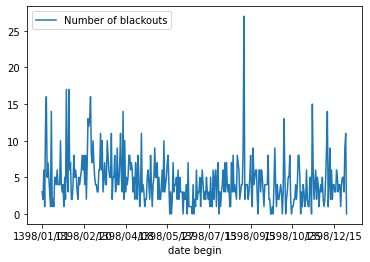

In [2]:
df.plot()
pyplot.show()

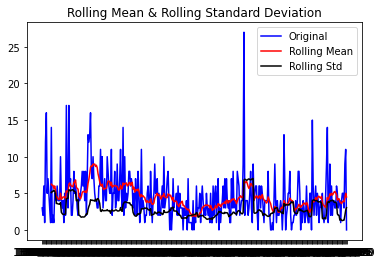

In [3]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
black=df['Number of blackouts']

print("p-value:", adfuller(black.dropna())[1])

p-value: 0.005937711568787484


_So the data is stationary_

In [5]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Number of blackouts'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1899.363, Time=1.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2105.593, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2018.991, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1895.142, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2103.594, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1896.077, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1896.046, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1897.372, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1893.259, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1894.238, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1894.206, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2016.991, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1895.514, Time=0.22 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.120 seconds


In [6]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(366, 1)
(336, 1) (30, 1)


In [16]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Number of blackouts'],order=(0,1,1))
model=model.fit()
model.summary()

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fore

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                               
=================================================================================
Dep. Variable:     D.Number of blackouts   No. Observations:                  335
Model:                    ARIMA(0, 1, 1)   Log Likelihood                -866.689
Method:                          css-mle   S.D. of innovations              3.205
Date:                   Mon, 05 Apr 2021   AIC                           1739.378
Time:                           19:02:16   BIC                           1750.820
Sample:                                1   HQIC                          1743.940
                                                                                 
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0060      0.010     -0.621      0.534      -0.025       0.013
ma.L1.D.Number of blackouts    -0.9479      0.020    -46.990      0.000      -0.987      -0.908
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0550           +0.0000j            1.0550            0.0000
-----------------------------------------------------------------------------
"""

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='date begin'>

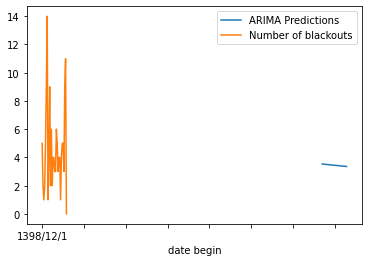

In [17]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Number of blackouts'].plot(legend=True)

# Second Try

In [19]:
import numpy as np
import pmdarima as pm
# fitting a stepwise model:
stepwise_fit = pm.auto_arima(df['Number of blackouts'], start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=False, d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

stepwise_fit.summary()


C:\Users\asus\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1896.077, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2105.593, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2018.991, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1895.142, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2103.594, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1896.046, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1897.372, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1893.259, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1894.238, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1894.206, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2016.991, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1895.514, Time=0.27 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.721 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -944.629
Date:                Mon, 05 Apr 2021   AIC                           1893.259
Time:                        19:06:04   BIC                           1901.058
Sample:                             0   HQIC                          1896.358
                                - 366                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9469      0.018    -51.314      0.000      -0.983      -0.911
sigma2        10.2980      0.359     28.716      0.000       9.595      11.001
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):              1207.29
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             1.97
Prob(H) (two-sided):                  0.02   Kurtosis:                        10.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
from bokeh.plotting import figure, show, output_notebook
import pandas as pd

# init bokeh
output_notebook()

def plot_arima(truth, forecasts, title="ARIMA", xaxis_label='Time',
               yaxis_label='Value', c1='#A6CEE3', c2='#B2DF8A', 
               forecast_start=None, **kwargs):
    
    # make truth and forecasts into pandas series
    n_truth = truth.shape[0]
    n_forecasts = forecasts.shape[0]
    
    # always plot truth the same
    truth = pd.Series(truth, index=np.arange(truth.shape[0]))
    
    # if no defined forecast start, start at the end
    if forecast_start is None:
        idx = np.arange(n_truth, n_truth + n_forecasts)
    else:
        idx = np.arange(forecast_start, n_forecasts)
    forecasts = pd.Series(forecasts, index=idx)
    
    # set up the plot
    p = figure(title=title, plot_height=400, **kwargs)
    p.grid.grid_line_alpha=0.3
    p.xaxis.axis_label = xaxis_label
    p.yaxis.axis_label = yaxis_label
    
    # add the lines
    p.line(truth.index, truth.values, color=c1, legend='Observed')
    p.line(forecasts.index, forecasts.values, color=c2, legend='Forecasted')
    
    return p

Loading BokehJS ...

In [21]:
in_sample_preds = stepwise_fit.predict_in_sample()
in_sample_preds[:10]

array([0.        , 2.99997075, 2.49924534, 3.67192847, 2.99702501,
       4.82954135, 6.74158837, 6.48328307, 6.55118449, 6.36742493])

In [22]:
show(plot_arima(df.all(), in_sample_preds, 
                title="Original Series & In-sample Predictions", 
                c2='#FF0000', forecast_start=0))

In [23]:
next_25 = stepwise_fit.predict(n_periods=25)
next_25

array([4.40484554, 4.40484554, 4.40484554, 4.40484554, 4.40484554,
       4.40484554, 4.40484554, 4.40484554, 4.40484554, 4.40484554,
       4.40484554, 4.40484554, 4.40484554, 4.40484554, 4.40484554,
       4.40484554, 4.40484554, 4.40484554, 4.40484554, 4.40484554,
       4.40484554, 4.40484554, 4.40484554, 4.40484554, 4.40484554])

In [24]:
# call the plotting func
show(plot_arima(df['Number of blackouts'], next_25))